# 1.Reading images files from folder and apply canny edge detection technique 

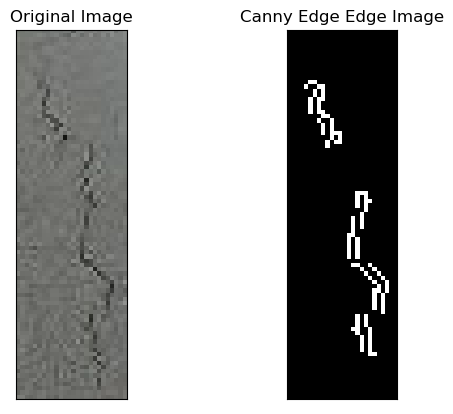

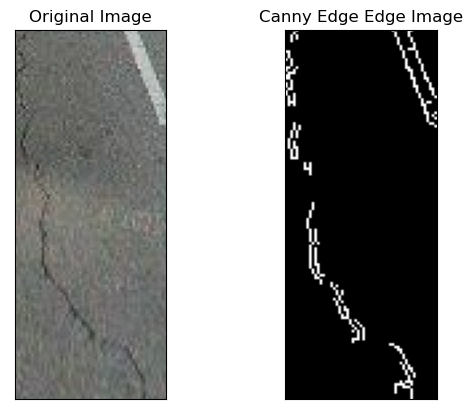

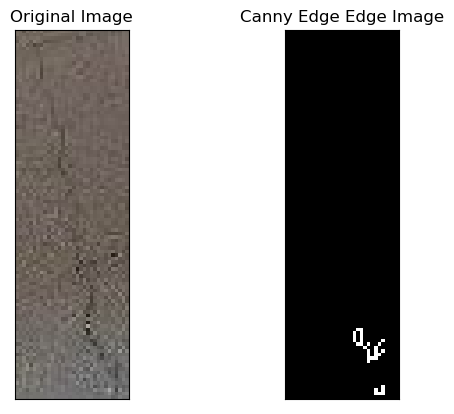

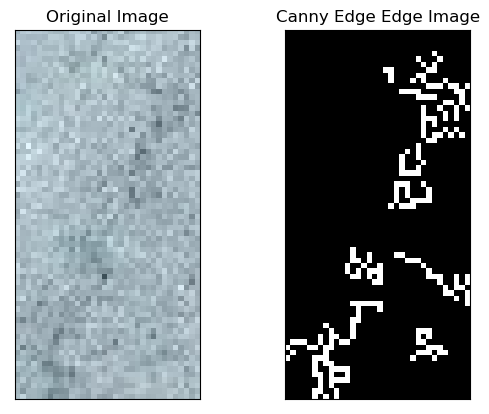

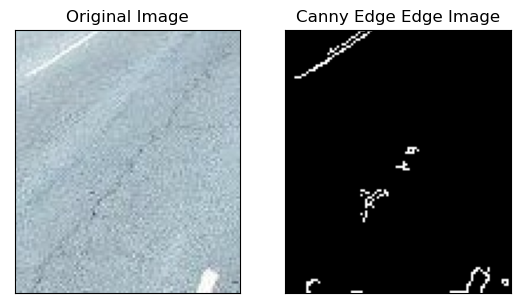

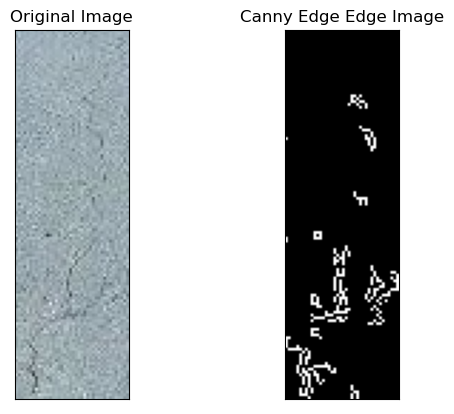

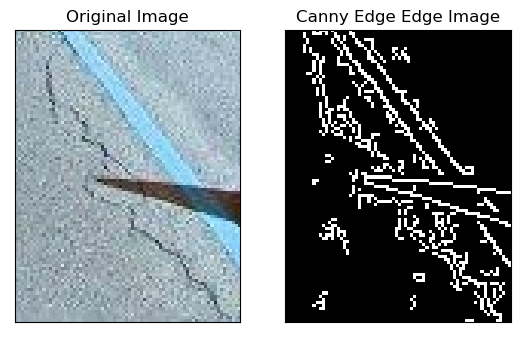

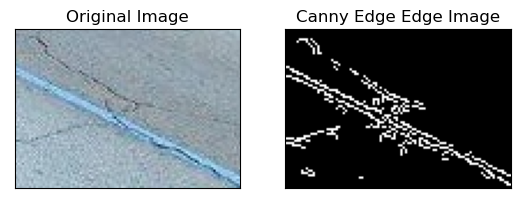

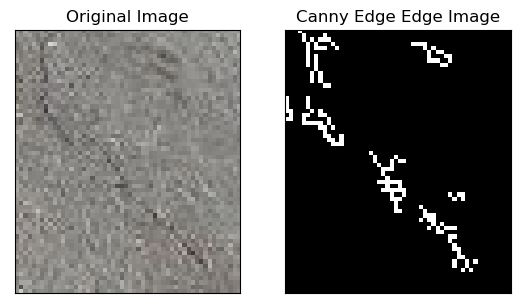

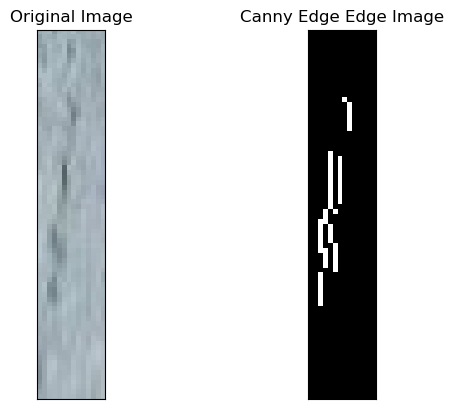

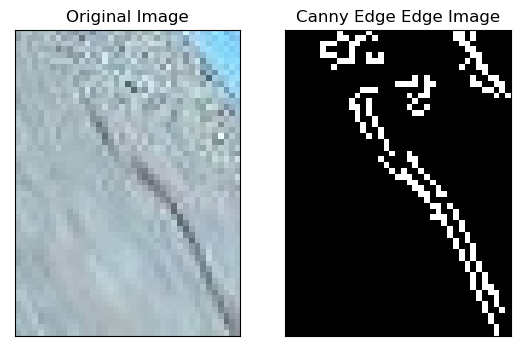

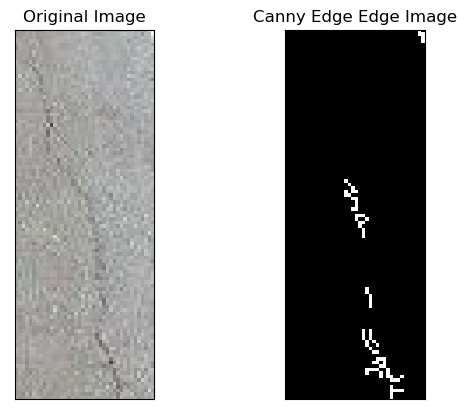

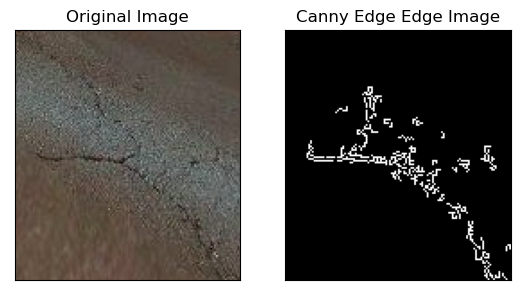

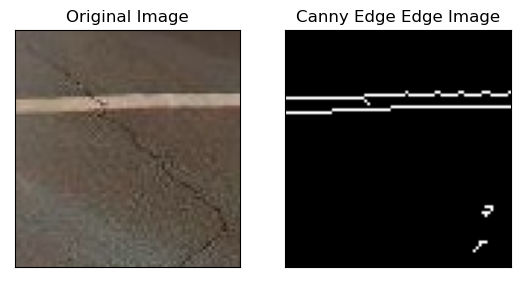

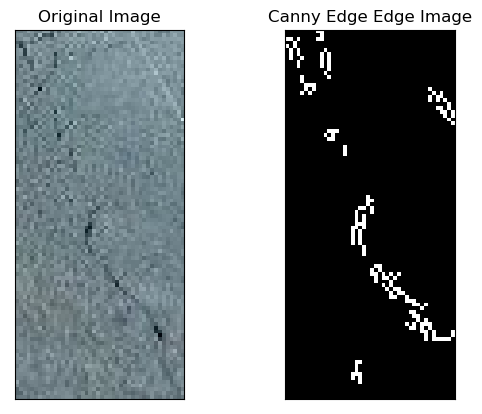

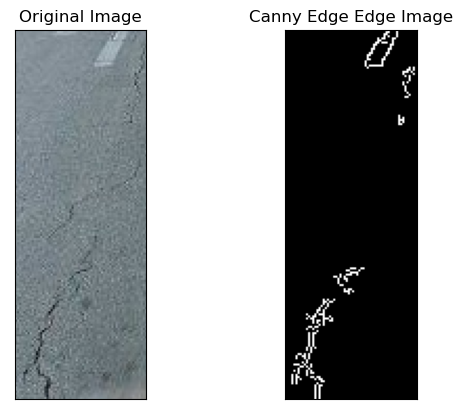

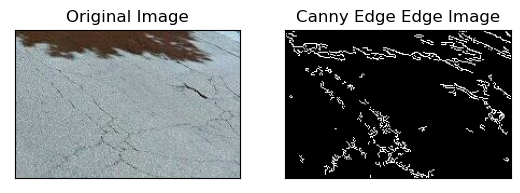

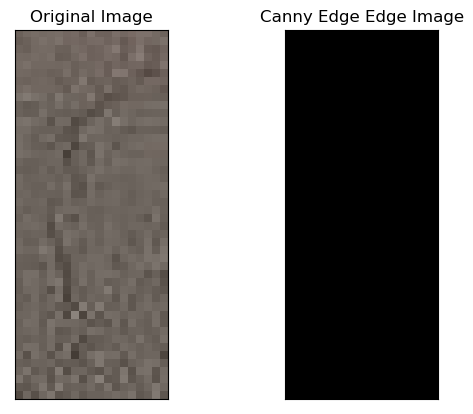

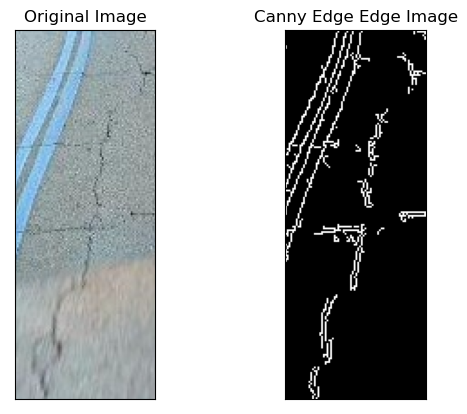

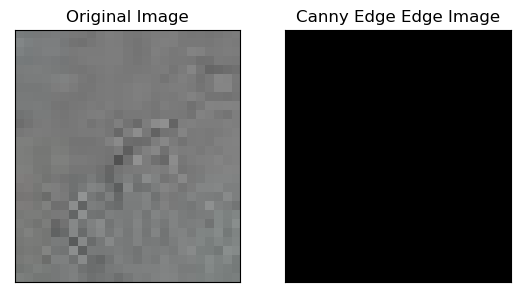

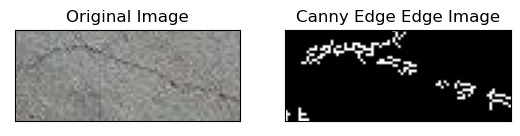

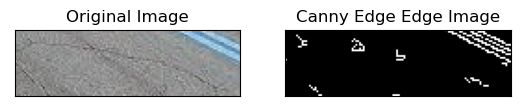

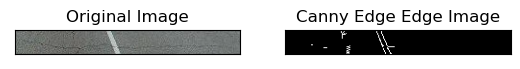

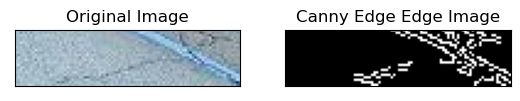

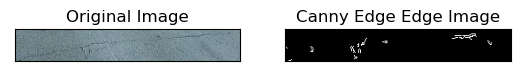

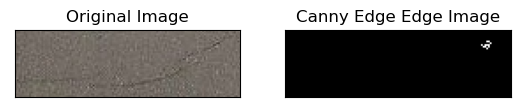

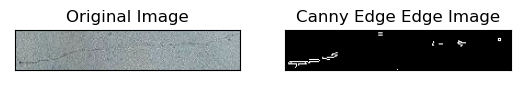

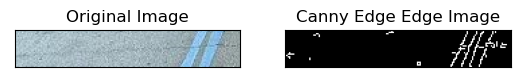

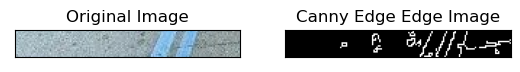

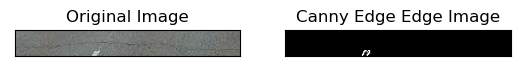

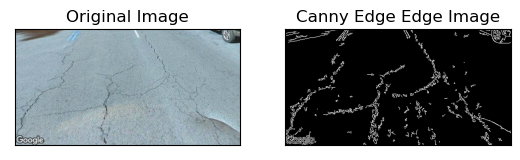

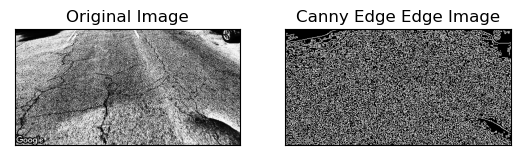

<Figure size 640x480 with 0 Axes>

In [29]:
import os

# folder path
# dir_path = r'C:\Users\ehtis\OneDrive\Desktop\Computer_Vision\test2\results\\'
import cv2 
import os 
import glob 
import matplotlib.pyplot as plt 
%matplotlib inline 
 
#Set the path where images are stored 
img_dir = r"C:\Users\ehtis\OneDrive\Desktop\Computer_Vision\test2\results\\" # Enter Directory of all images  
data_path = os.path.join(img_dir,'*g') 
files = glob.glob(data_path) 
data = [] 
for f1 in files: 
    img = cv2.imread(f1) 
    data.append(img)
    edges = cv.Canny(img,100,255)
    plt.subplot(121),plt.imshow(img,cmap = 'gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(edges,cmap = 'gray')
    plt.title('Canny Edge Edge Image'), plt.xticks([]), plt.yticks([])
    plt.show()    
    plt.figure() 


# 2.Histogram equalization of image

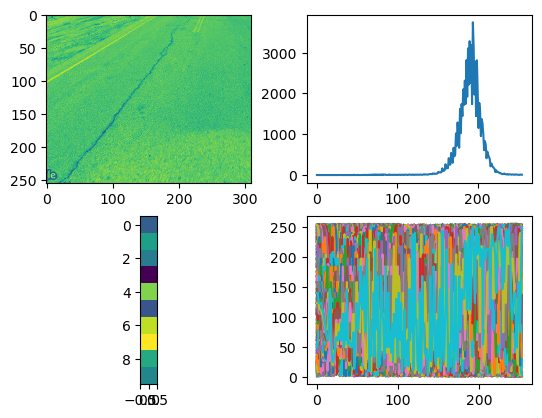

In [24]:
import cv2
import matplotlib.pyplot as plt
import os

# folder path
# dir_path = r'C:\Users\ehtis\OneDrive\Desktop\Computer_Vision\test2\results\\'
import cv2 
import os 
import glob 
import matplotlib.pyplot as plt 
%matplotlib inline 
 
#Set the path where images are stored 
img_dir = r"C:\Users\ehtis\OneDrive\Desktop\Computer_Vision\test2\results\\"  # Enter Directory of all images  
data_path = os.path.join(img_dir,'*g') 
files = glob.glob(data_path) 
data = []
for f1 in files: 
    img = cv2.imread(f1,0)
#     img = cv2.imread(r"C:\Users\ehtis\OneDrive\Desktop\Computer_Vision\test2\results\case_D20_27.jpg",0)
    hist1 = cv2.calcHist([img],[0],None,[256],[0,256])
    img_2 = cv2.equalizeHist(img)
    hist2 = cv2.calcHist([img_2],[0],None,[10],[0,256])
    plt.subplot(221),plt.imshow(img);
    plt.subplot(222),plt.plot(hist1);
    plt.subplot(223),plt.imshow(hist2);
    plt.subplot(224),plt.plot(img_2);
        

# 3.Roberts edge detection

(Text(0.5, 1.0, 'Roberts edge detection'),
 <matplotlib.image.AxesImage at 0x1e86bee7100>)

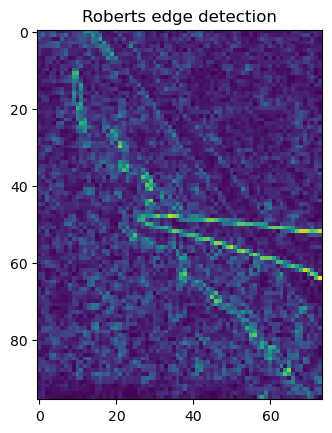

In [39]:
import cv2 
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
  
roberts_cross_v = np.array( [[1, 0 ],
                             [0,-1 ]] )
  
roberts_cross_h = np.array( [[ 0, 1 ],
                             [ -1, 0 ]] )
  
img = cv2.imread(r"C:\Users\ehtis\OneDrive\Desktop\Computer_Vision\test2\results\case_D00_17.jpg",0).astype('float64')
img/=255.0
vertical = ndimage.convolve( img, roberts_cross_v )
horizontal = ndimage.convolve( img, roberts_cross_h )
  
edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
edged_img*=255
plt.title('Roberts edge detection'),plt.imshow(edged_img)

# 4.Sobel Edge Detection

[[[177 164 145]
  [204 193 173]
  [200 192 173]
  ...
  [215 208 182]
  [209 202 176]
  [227 217 192]]

 [[173 160 141]
  [200 189 169]
  [152 144 125]
  ...
  [189 182 156]
  [200 190 165]
  [214 204 179]]

 [[203 192 172]
  [216 205 185]
  [160 152 133]
  ...
  [191 181 156]
  [189 179 154]
  [202 192 167]]

 ...

 [[187 175 161]
  [187 175 161]
  [172 160 146]
  ...
  [185 177 154]
  [200 192 169]
  [190 184 160]]

 [[181 169 153]
  [188 176 160]
  [173 161 145]
  ...
  [212 200 178]
  [180 168 146]
  [148 136 114]]

 [[177 168 151]
  [193 184 167]
  [176 167 150]
  ...
  [222 207 186]
  [183 168 147]
  [193 178 157]]]


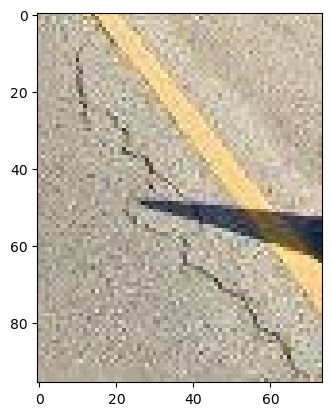

[[0.63529412 0.74509804 0.7372549  ... 0.78823529 0.76470588 0.83137255]
 [0.61960784 0.72941176 0.54901961 ... 0.68627451 0.7254902  0.78039216]
 [0.74117647 0.79215686 0.58039216 ... 0.69019608 0.68235294 0.73333333]
 ...
 [0.68235294 0.68235294 0.62352941 ... 0.6745098  0.73333333 0.69803922]
 [0.65490196 0.68235294 0.62352941 ... 0.76862745 0.64313725 0.51764706]
 [0.64705882 0.70980392 0.64313725 ... 0.80392157 0.65098039 0.69019608]]


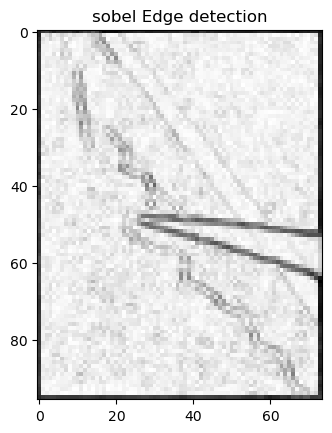

In [40]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from math import sqrt
import time

class sobel_edge_detector:
    def __init__(self, path= None, img= None):
        if path != None:
            self.image = mpimg.imread(path)
        else:
            self.image = img
        self.orig_img = self.image
        self.vertical_grad_filter = np.array([[1, 0, -1],[2, 0, -2],[1, 0, -1]])
        self.horizontal_grad_filter = np.array([[1, 2, 1],[0, 0, 0],[-1, -2, -1]])
        print(self.image)

    def cvt2gray(self):
        self.image = np.dot(self.image, [1, 1, 1])//3
        self.image = self.image/255
        print(self.image)

    def detect_edges(self):
        self.cvt2gray()
        kernel_width = self.vertical_grad_filter.shape[0]//2
        grad_ = np.zeros(self.image.shape)

        self.image = np.pad(self.image, pad_width= ([kernel_width, ], [kernel_width, ]), 
        mode= 'constant', constant_values= (0, 0))
        for i in range(kernel_width, self.image.shape[0] - kernel_width):
            for j in range(kernel_width, self.image.shape[1] - kernel_width):
                x = self.image[i - kernel_width: i + kernel_width + 1, j - kernel_width: j + kernel_width + 1]
                x = x.flatten() * self.vertical_grad_filter.flatten()
                sum_x = x.sum()

                y = self.image[i - kernel_width: i + kernel_width + 1, j - kernel_width: j + kernel_width + 1]
                y = y.flatten() * self.horizontal_grad_filter.flatten()
                sum_y = y.sum()
        
                grad_[i - kernel_width][j - kernel_width] = sqrt(sum_x**2 + sum_y**2)
        self.image = grad_
        return self.image
        # loc_time = time.localtime(time.time())
        # m = str(loc_time.tm_year) + str(loc_time.tm_mon) + str(loc_time.tm_mday) + str(loc_time.tm_hour) + str(loc_time.tm_min) + str(loc_time.tm_sec)
        # img_save_name = 'sobel_edge_det_' + m + ".jpg"
        # plt.imsave(img_save_name, self.image)

    def show_image(self, orig = 0):
        if orig == 1:
            plt.imshow(self.orig_img)
            plt.show()
        if orig == 0:
            for i in range(len(self.image)):
                for j in range(len(self.image[0])):
                    self.image[i][j] = 1 - self.image[i][j] 
            plt.imshow(self.image, cmap= 'gray')
            plt.title("sobel Edge detection")
            plt.show()


if __name__ == "__main__":
    img = sobel_edge_detector(r"C:\Users\ehtis\OneDrive\Desktop\Computer_Vision\test2\results\case_D00_17.jpg")
    img.show_image(1)
    img.detect_edges()
    img.show_image()
    

# 5.Prewitt Edge Detection

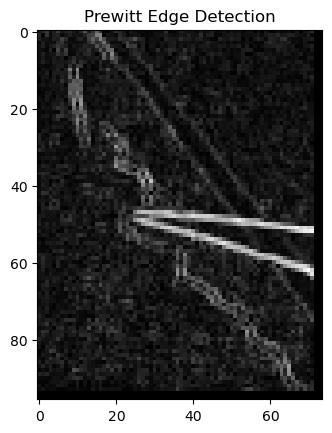

In [41]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Open the image
img = np.array(Image.open(r"C:\Users\ehtis\OneDrive\Desktop\Computer_Vision\test2\results\case_D00_17.jpg")).astype(np.uint8)

# Apply gray scale
gray_img = np.round(0.299 * img[:, :, 0] +
                    0.587 * img[:, :, 1] +
                    0.114 * img[:, :, 2]).astype(np.uint8)

# Prewitt Operator
h, w = gray_img.shape
# define filters
horizontal = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])  # s2
vertical = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])  # s1

# define images with 0s
newgradientImage = np.zeros((h, w))

# offset by 1
for i in range(1, h - 1):
    for j in range(1, w - 1):
        horizontalGrad = (horizontal[0, 0] * gray_img[i - 1, j - 1]) + \
                         (horizontal[0, 1] * gray_img[i - 1, j]) + \
                         (horizontal[0, 2] * gray_img[i - 1, j + 1]) + \
                         (horizontal[1, 0] * gray_img[i, j - 1]) + \
                         (horizontal[1, 1] * gray_img[i, j]) + \
                         (horizontal[1, 2] * gray_img[i, j + 1]) + \
                         (horizontal[2, 0] * gray_img[i + 1, j - 1]) + \
                         (horizontal[2, 1] * gray_img[i + 1, j]) + \
                         (horizontal[2, 2] * gray_img[i + 1, j + 1])

        verticalGrad = (vertical[0, 0] * gray_img[i - 1, j - 1]) + \
                       (vertical[0, 1] * gray_img[i - 1, j]) + \
                       (vertical[0, 2] * gray_img[i - 1, j + 1]) + \
                       (vertical[1, 0] * gray_img[i, j - 1]) + \
                       (vertical[1, 1] * gray_img[i, j]) + \
                       (vertical[1, 2] * gray_img[i, j + 1]) + \
                       (vertical[2, 0] * gray_img[i + 1, j - 1]) + \
                       (vertical[2, 1] * gray_img[i + 1, j]) + \
                       (vertical[2, 2] * gray_img[i + 1, j + 1])

        # Edge Magnitude
        mag = np.sqrt(pow(horizontalGrad, 2.0) + pow(verticalGrad, 2.0))
        newgradientImage[i - 1, j - 1] = mag


plt.figure()
# plt.title('dancing-spider-prewitt.png')
# plt.imsave('dancing-spider-prewitt.png', newgradientImage, cmap='gray', format='png')
plt.imshow(newgradientImage, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.show()

# 6.LoG edge detection

Text(0.5, 1.0, 'Laplacian edge detection')

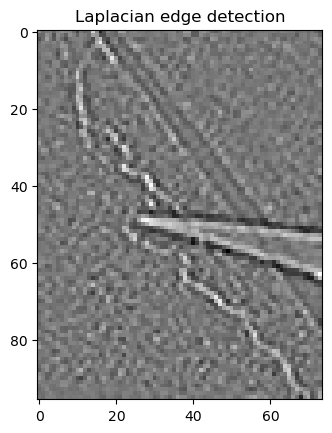

In [42]:
# Load the image in greyscale
img = cv2.imread(r
# import necessary libraries
 
import cv2
import numpy as np
 
# Turn on Laptop's webcam
cap = cv2.VideoCapture(0)
 
while True:
     
    ret, frame = cap.read()
 
    # Locate points of the documents
    # or object which you want to transform
    pts1 = np.float32([[0, 260], [640, 260],
                       [0, 400], [640, 400]])
    pts2 = np.float32([[0, 0], [400, 0],
                       [0, 640], [400, 640]])
     
    # Apply Perspective Transform Algorithm
    matrix = cv2.getPerspectiveTransform(pts1, pts2)
    result = cv2.warpPerspective(frame, matrix, (500, 600))
     
    # Wrap the transformed image
    cv2.imshow('frame', frame) # Initial Capture
    cv2.imshow('frame1', result) # Transformed Capture
 
    if cv2.waitKey(24) == 27:
        break
 
cap.release()
cv2.destroyAllWindows(),0)
# Apply Gaussian Blur
blur = cv2.GaussianBlur(img,(3,3),0)
# Apply Laplacian operator in some higher datatype
laplacian = cv2.Laplacian(blur,cv2.CV_64F)
laplacian1 = laplacian/laplacian.max()
plt.imshow(laplacian1,cmap='gray')
plt.title("Laplacian edge detection")


In [16]:
def Zero_crossing(image):
    z_c_image = np.zeros(image.shape)
   # For each pixel, count the number of positive
   # and negative pixels in the neighborhood
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            negative_count = 0
            positive_count = 0
            neighbour = [image[i+1, j-1],image[i+1, j],image[i+1, j+1],image[i, j-1],image[i, j+1],image[i-1, j-1],image[i-1, j],image[i-1, j+1]]
            d = max(neighbour)
            e = min(neighbour)
            for h in neighbour:
               if h>0:
                positive_count += 1
               elif h<0:
                 negative_count += 1
             # If both negative and positive values exist in
             # the pixel neighborhood, then that pixel is a
             # potential zero crossing
               z_c = ((negative_count > 0) and (positive_count > 0))
           # Change the pixel value with the maximum neighborhood
               # difference with the pixel
               if z_c:
                     if image[i,j]>0:
                        z_c_image[i, j] = image[i,j] + np.abs(e)
                     elif image[i,j]<0:
                        z_c_image[i, j] = np.abs(image[i,j]) + d
       # Normalize and change datatype to 'uint8' (optional)
               z_c_norm = z_c_image/z_c_image.max()*255
               z_c_image = np.uint8(z_c_norm)
    return z_c_image
z_c_image=Zero_crossing(laplacian1)
plt.imshow(z_c_image,cmap='gray')

C:\Users\ehtis\AppData\Local\Temp\ipykernel_13948\982916636.py:29: RuntimeWarning: invalid value encountered in true_divide
  z_c_norm = z_c_image/z_c_image.max()*255


KeyboardInterrupt: 

# 2. canny edge detection

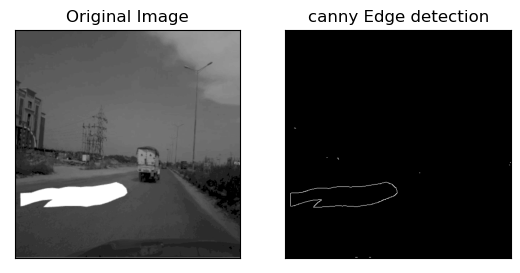

In [9]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread(r"C:\Users\ehtis\OneDrive\Desktop\perespetive transformation\Capture.PNG",0)
edges = cv.Canny(img,230,255)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('canny Edge detection'), plt.xticks([]), plt.yticks([])
plt.show()

In [5]:
import cv2
import math
import numpy as np
import scipy.ndimage

def orientated_non_max_suppression(mag, ang):
    ang_quant = np.round(ang / (np.pi/4)) % 4
    winE = np.array([[0, 0, 0],[1, 1, 1], [0, 0, 0]])
    winSE = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
    winS = np.array([[0, 1, 0], [0, 1, 0], [0, 1, 0]])
    winSW = np.array([[0, 0, 1], [0, 1, 0], [1, 0, 0]])

    magE = non_max_suppression(mag, winE)
    magSE = non_max_suppression(mag, winSE)
    magS = non_max_suppression(mag, winS)
    magSW = non_max_suppression(mag, winSW)

    mag[ang_quant == 0] = magE[ang_quant == 0]
    mag[ang_quant == 1] = magSE[ang_quant == 1]
    mag[ang_quant == 2] = magS[ang_quant == 2]
    mag[ang_quant == 3] = magSW[ang_quant == 3]
    return mag

def non_max_suppression(data, win):
    data_max =scipy.ndimage.filters.maximum_filter(data,footprint=win,mode='constant')
    data_max[data != data_max] = 0
    return data_max

# start calulcation
gray_image = cv2.imread(r'C:\Users\ehtis\OneDrive\Desktop\Computer_Vision\test2\results\case_D20_27.jpg', 0)

with_nmsup = True #apply non-maximal suppression
fudgefactor = 1.3 #with this threshold you can play a little bit
sigma = 21 #for Gaussian Kernel
kernel = 2*math.ceil(2*sigma)+1 #Kernel size

gray_image = gray_image/255.0
blur = cv2.GaussianBlur(gray_image, (kernel, kernel), sigma)
gray_image = cv2.subtract(gray_image, blur)

# compute sobel response
sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
mag = np.hypot(sobelx, sobely)
ang = np.arctan2(sobely, sobelx)

# threshold
threshold = 4 * fudgefactor * np.mean(mag)
mag[mag < threshold] = 0

#either get edges directly
if with_nmsup is False:
    mag = cv2.normalize(mag, 0, 255, cv2.NORM_MINMAX)
    kernel = np.ones((5,5),np.uint8)
    result = cv2.morphologyEx(mag, cv2.MORPH_CLOSE, kernel)
    cv2.imshow('im', result)
#     cv2.waitKey()

#or apply a non-maximal suppression
else:

    # non-maximal suppression
    mag = orientated_non_max_suppression(mag, ang)
    # create mask
    mag[mag > 0] = 255
    mag = mag.astype(np.uint8)

    kernel = np.ones((5,5),np.uint8)
    result = cv2.morphologyEx(mag, cv2.MORPH_CLOSE, kernel)

    cv2.imshow('im', result)
#     cv2.waitKey()

C:\Users\ehtis\AppData\Local\Temp\ipykernel_7744\267377182.py:25: DeprecationWarning: Please use `maximum_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  data_max =scipy.ndimage.filters.maximum_filter(data,footprint=win,mode='constant')


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1267: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [3]:
non_max_suppression()

TypeError: non_max_suppression() missing 2 required positional arguments: 'data' and 'win'

In [18]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
frame = cv.imread(r"C:\Users\ehtis\OneDrive\Desktop\Computer_Vision\test2\results\case_D20_27.jpg",0)
# Convert to graycsale
# img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
# img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 
# edges = cv.Sobel((img,127,255))
# Convert to HSV for simpler calculations
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

# Calculation of Sobelx
sobelx = cv2.Sobel(frame,cv2.CV_64F,1,0,ksize=5)

# Calculation of Sobely
sobely = cv2.Sobel(frame,cv2.CV_64F,0,1,ksize=5)

# Calculation of Laplacian
laplacian = cv2.Laplacian(frame,cv2.CV_64F)

cv2.imshow('sobelx',sobelx)
cv2.imshow('sobely',sobely)
cv2.imshow('laplacian',laplacian)

error: OpenCV(4.6.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x2b45e655::Set<3,-1,-1>,struct cv::impl::A0x2b45e655::Set<0,5,-1>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [28]:
import skimage.io
import skimage.feature
import sys
img = cv2.imread(r"C:\Users\ehtis\OneDrive\Desktop\New folder\sevrity of crack\crack.jpg") 
# read command-line arguments
filename = img
sigma = float(sys.argv[2])
low_threshold = float(sys.argv[3])
high_threshold = float(sys.argv[4])

ValueError: could not convert string to float: 'C:\\Users\\ehtis\\AppData\\Roaming\\jupyter\\runtime\\kernel-c90f2d2f-4f06-4b75-b638-cfa0b7611381.json'

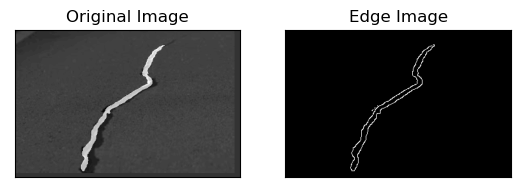

In [18]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread(r"C:\Users\ehtis\OneDrive\Desktop\perespetive transformation\3.PNG",0)
edges = cv.Canny(img,230,255)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
import cv2
 
# Read the original image
img = cv2.imread(r"C:\Users\ehtis\OneDrive\Desktop\New folder\sevrity of crack\crack.jpg") 
# Display original image
cv2.imshow('Original', img)
cv2.waitKey(0)
 
# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 
 
# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
# Display Sobel Edge Detection Images
cv2.imshow('Sobel X', sobelx)
# cv2.waitKey(0)
# cv2.imshow('Sobel Y', sobely)
cv2.waitKey(0)
cv2.imshow('Sobel X Y using Sobel() function', sobelxy)
# cv2.waitKey(0)00
 
# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
# Display Canny Edge Detection Image
cv2.imshow('Canny Edge Detection', edges)
cv2.waitKey(0)
 
cv2.destroyAllWindows()

In [ ]:
import cv2

In [ ]:
print("hello world")

In [2]:
import cv2
img = cv2.imread(r"C:\Users\ehtis\OneDrive\Desktop\New folder\sevrity of crack\crack.jpg") 
# Display original image
cv2.imshow('Original', img)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 
 
# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection

In [6]:
cv2.imshow('Sobel X', sobelx)
cv2.imshow('Sobel Y', sobely)
cv2.imshow('Sobel X Y using Sobel() function', sobelxy
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) 

SyntaxError: invalid syntax (2746370268.py, line 4)

In [8]:
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) 
cv2.imshow('Canny Edge Detection', edges)